In [33]:
#here we import important library 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [34]:
#importing dataset
dataset=pd.read_csv('../datasets/tested.csv')
dataset.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


Analysing Dataset

In [35]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [36]:
dataset.shape

(418, 12)

Visualizing dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_14360\2988388491.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Survived'],legend=False , palette='winter')


<Axes: xlabel='Survived', ylabel='count'>

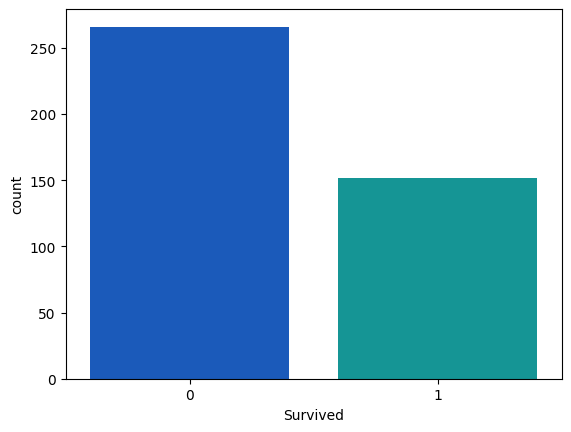

In [37]:
sns.countplot(x=dataset['Survived'],legend=False , palette='winter')

<Axes: xlabel='Sex', ylabel='count'>

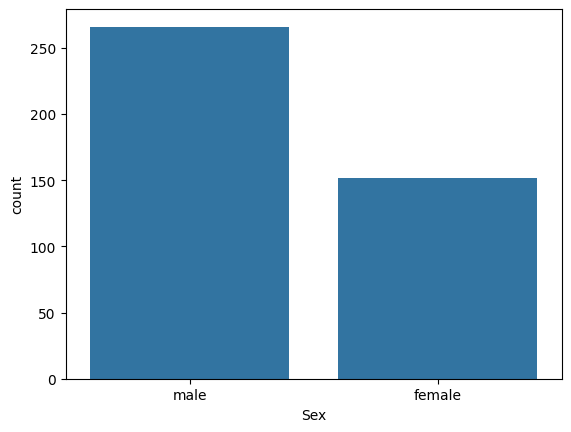

In [38]:
sns.countplot(x=dataset['Sex'] )

<Axes: xlabel='Pclass', ylabel='count'>

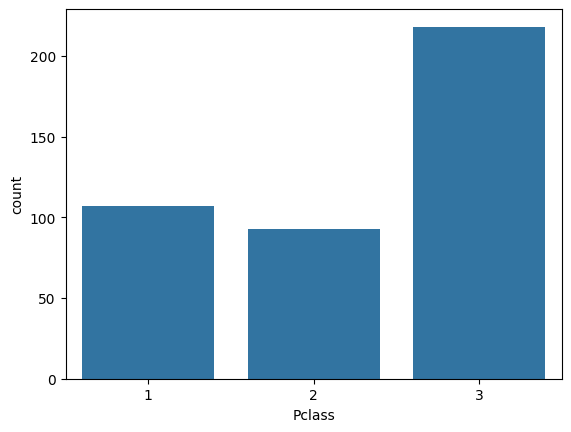

In [39]:
sns.countplot(x=dataset['Pclass'])

<Axes: ylabel='Frequency'>

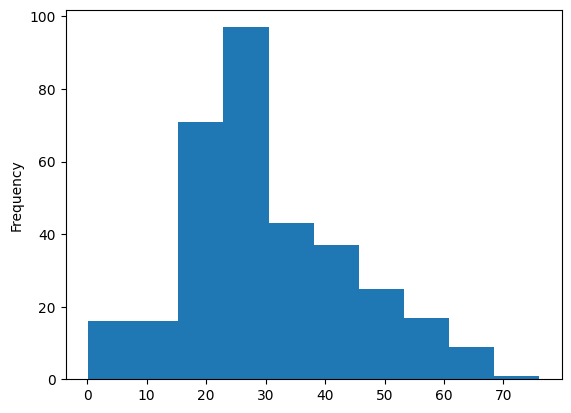

In [40]:
dataset['Age'].plot.hist()

Text(0.5, 0, 'Fare')

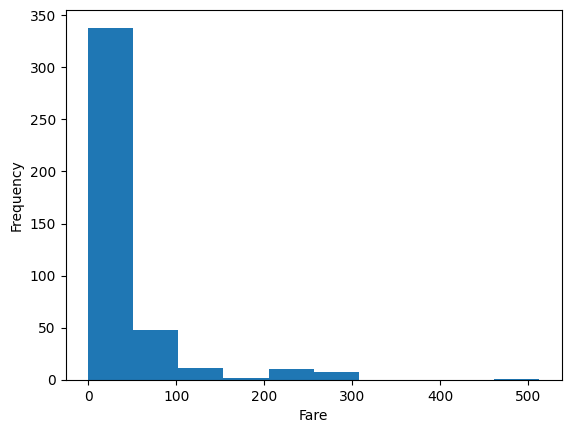

In [41]:
dataset['Fare'].plot.hist()
plt.xlabel('Fare')

Text(0.5, 0, 'SibSp')

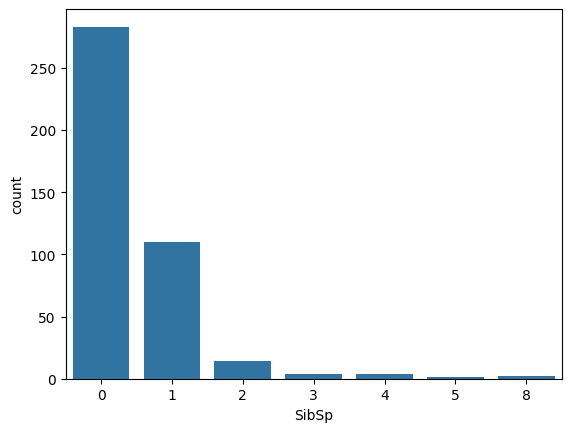

In [42]:
sns.countplot(x=dataset['SibSp'])
plt.xlabel('SibSp')

Text(0.5, 0, 'Parch')

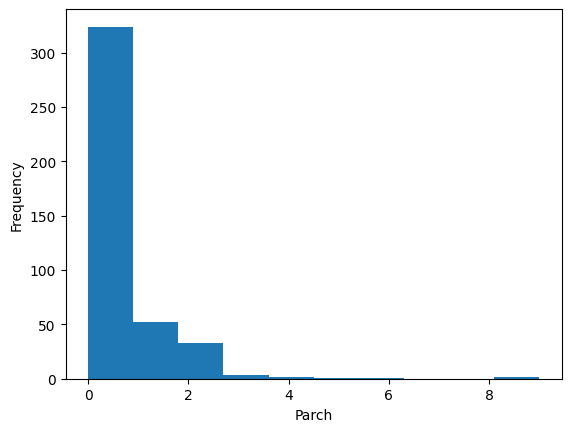

In [43]:
dataset['Parch'].plot.hist()
plt.xlabel('Parch')

Wrangling Dataset

In [44]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
#from the above analysis of null value in dataset we get that Cabin column have more null value so we drop it here 
dataset=dataset.drop('Cabin',axis=1)

<Axes: xlabel='Pclass', ylabel='count'>

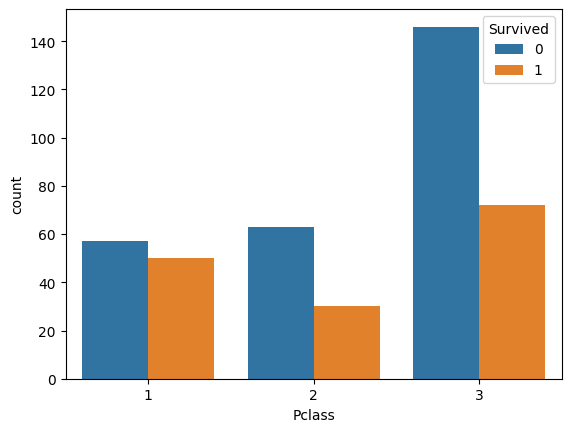

In [46]:
#comparing
sns.countplot(x=dataset['Pclass'],hue=dataset['Survived'])

<Axes: xlabel='Pclass', ylabel='Age'>

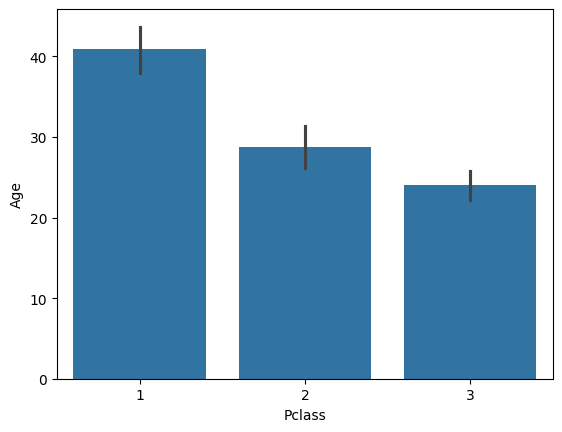

In [47]:
sns.barplot(x=dataset['Pclass'],y=dataset['Age'])

In [48]:
#removing every null value in dataset
dataset.dropna(inplace=True)
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [49]:
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [50]:
sex=pd.get_dummies(dataset['Sex'],drop_first=True,dtype=int)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [51]:
embark=pd.get_dummies(dataset['Embarked'],drop_first=True,dtype=int)
embark.head(3)

,Q,S
0,1,0
1,0,1
2,1,0


In [52]:
#adding new sex and embark dataset in original dataset
dataset=pd.concat([dataset,sex,embark],axis=1)
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0


In [53]:
dataset=dataset.drop(['Name','PassengerId','Embarked','Sex','Ticket'],axis=1)
dataset.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,34.5,0,0,7.8292,1,1,0
1,1,3,47.0,1,0,7.0000,0,0,1
2,0,2,62.0,0,0,9.6875,1,1,0


In [54]:
#Train Data
x=dataset.drop(['Survived'],axis=1)
y=dataset['Survived']
x.head(3)


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0


In [55]:
X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.26,random_state=6)

In [56]:
#Applying logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [57]:
lr.fit(X_train,Y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
prediction=lr.predict(X_test)
print(prediction)

[0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0
 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 1]


In [59]:
from sklearn.metrics import classification_report

In [60]:
classification_report(Y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        52\n           1       1.00      1.00      1.00        35\n\n    accuracy                           1.00        87\n   macro avg       1.00      1.00      1.00        87\nweighted avg       1.00      1.00      1.00        87\n'

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(Y_test,prediction)

array([[52,  0],
       [ 0, 35]], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,prediction)

1.0